Step 1: Import Libraries and Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset
train_df = pd.read_csv('train.csv')

# Load the test dataset (if needed)
test_df = pd.read_csv('test.csv')

# Load the sample submission file (if needed)
sample_submission_df = pd.read_csv('sample_submission.csv')

# Display basic information and the first few rows of the training dataset
print(train_df.info())
train_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

id  MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0   0                 5                   8                5              8   
1   1                 6                   7                4              4   
2   2                 6                   5                6              7   
3   3                 3                   4                6              5   
4   4                 5                   3                2              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4          3                      3   
1             8              8            3          5                      4   
2             3              7            1          5                      4   
3             4              8            4          7                      6   
4             4              4            3          3                      3   

   ...  DrainageSystems  CoastalVulnerability  Landslides  Watersheds  \
0  ...                5                     3           3           5   
1  ...                7                     2           0           3   
2  ...                7                     3           7           5   
3  ...                2                     4           7           4   
4  ...                2                     2           6           6   

   DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
0                            4                7            5   
1                            5                3            3   
2                            6                8            2   
3                            4                6            5   
4                            4                1            2   

   InadequatePlanning  PoliticalFactors  FloodProbability  
0                   7                 3             0.445  
1                   4                 3             0.450  
2                   3                 3             0.530  
3                   7                 5             0.535  
4                   3                 5             0.415  

[5 rows x 22 columns]

Step 2: Summary Statistics and Missing Values

In [3]:
# Summary statistics
summary_stats = train_df.describe()
print(summary_stats)

# Check for missing values
missing_values = train_df.isnull().sum()
print(missing_values)


                 id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
count  1.117957e+06      1.117957e+06        1.117957e+06     1.117957e+06   
mean   5.589780e+05      4.921450e+00        4.926671e+00     4.955322e+00   
std    3.227265e+05      2.056387e+00        2.093879e+00     2.072186e+00   
min    0.000000e+00      0.000000e+00        0.000000e+00     0.000000e+00   
25%    2.794890e+05      3.000000e+00        3.000000e+00     4.000000e+00   
50%    5.589780e+05      5.000000e+00        5.000000e+00     5.000000e+00   
75%    8.384670e+05      6.000000e+00        6.000000e+00     6.000000e+00   
max    1.117956e+06      1.600000e+01        1.800000e+01     1.600000e+01   

       Deforestation  Urbanization  ClimateChange   DamsQuality     Siltation  \
count   1.117957e+06  1.117957e+06   1.117957e+06  1.117957e+06  1.117957e+06   
mean    4.942240e+00  4.942517e+00   4.934093e+00  4.955878e+00  4.927791e+00   
std     2.051689e+00  2.083391e+00   2.057742e+00  2.0

Step 3: Visualize Data Distributions

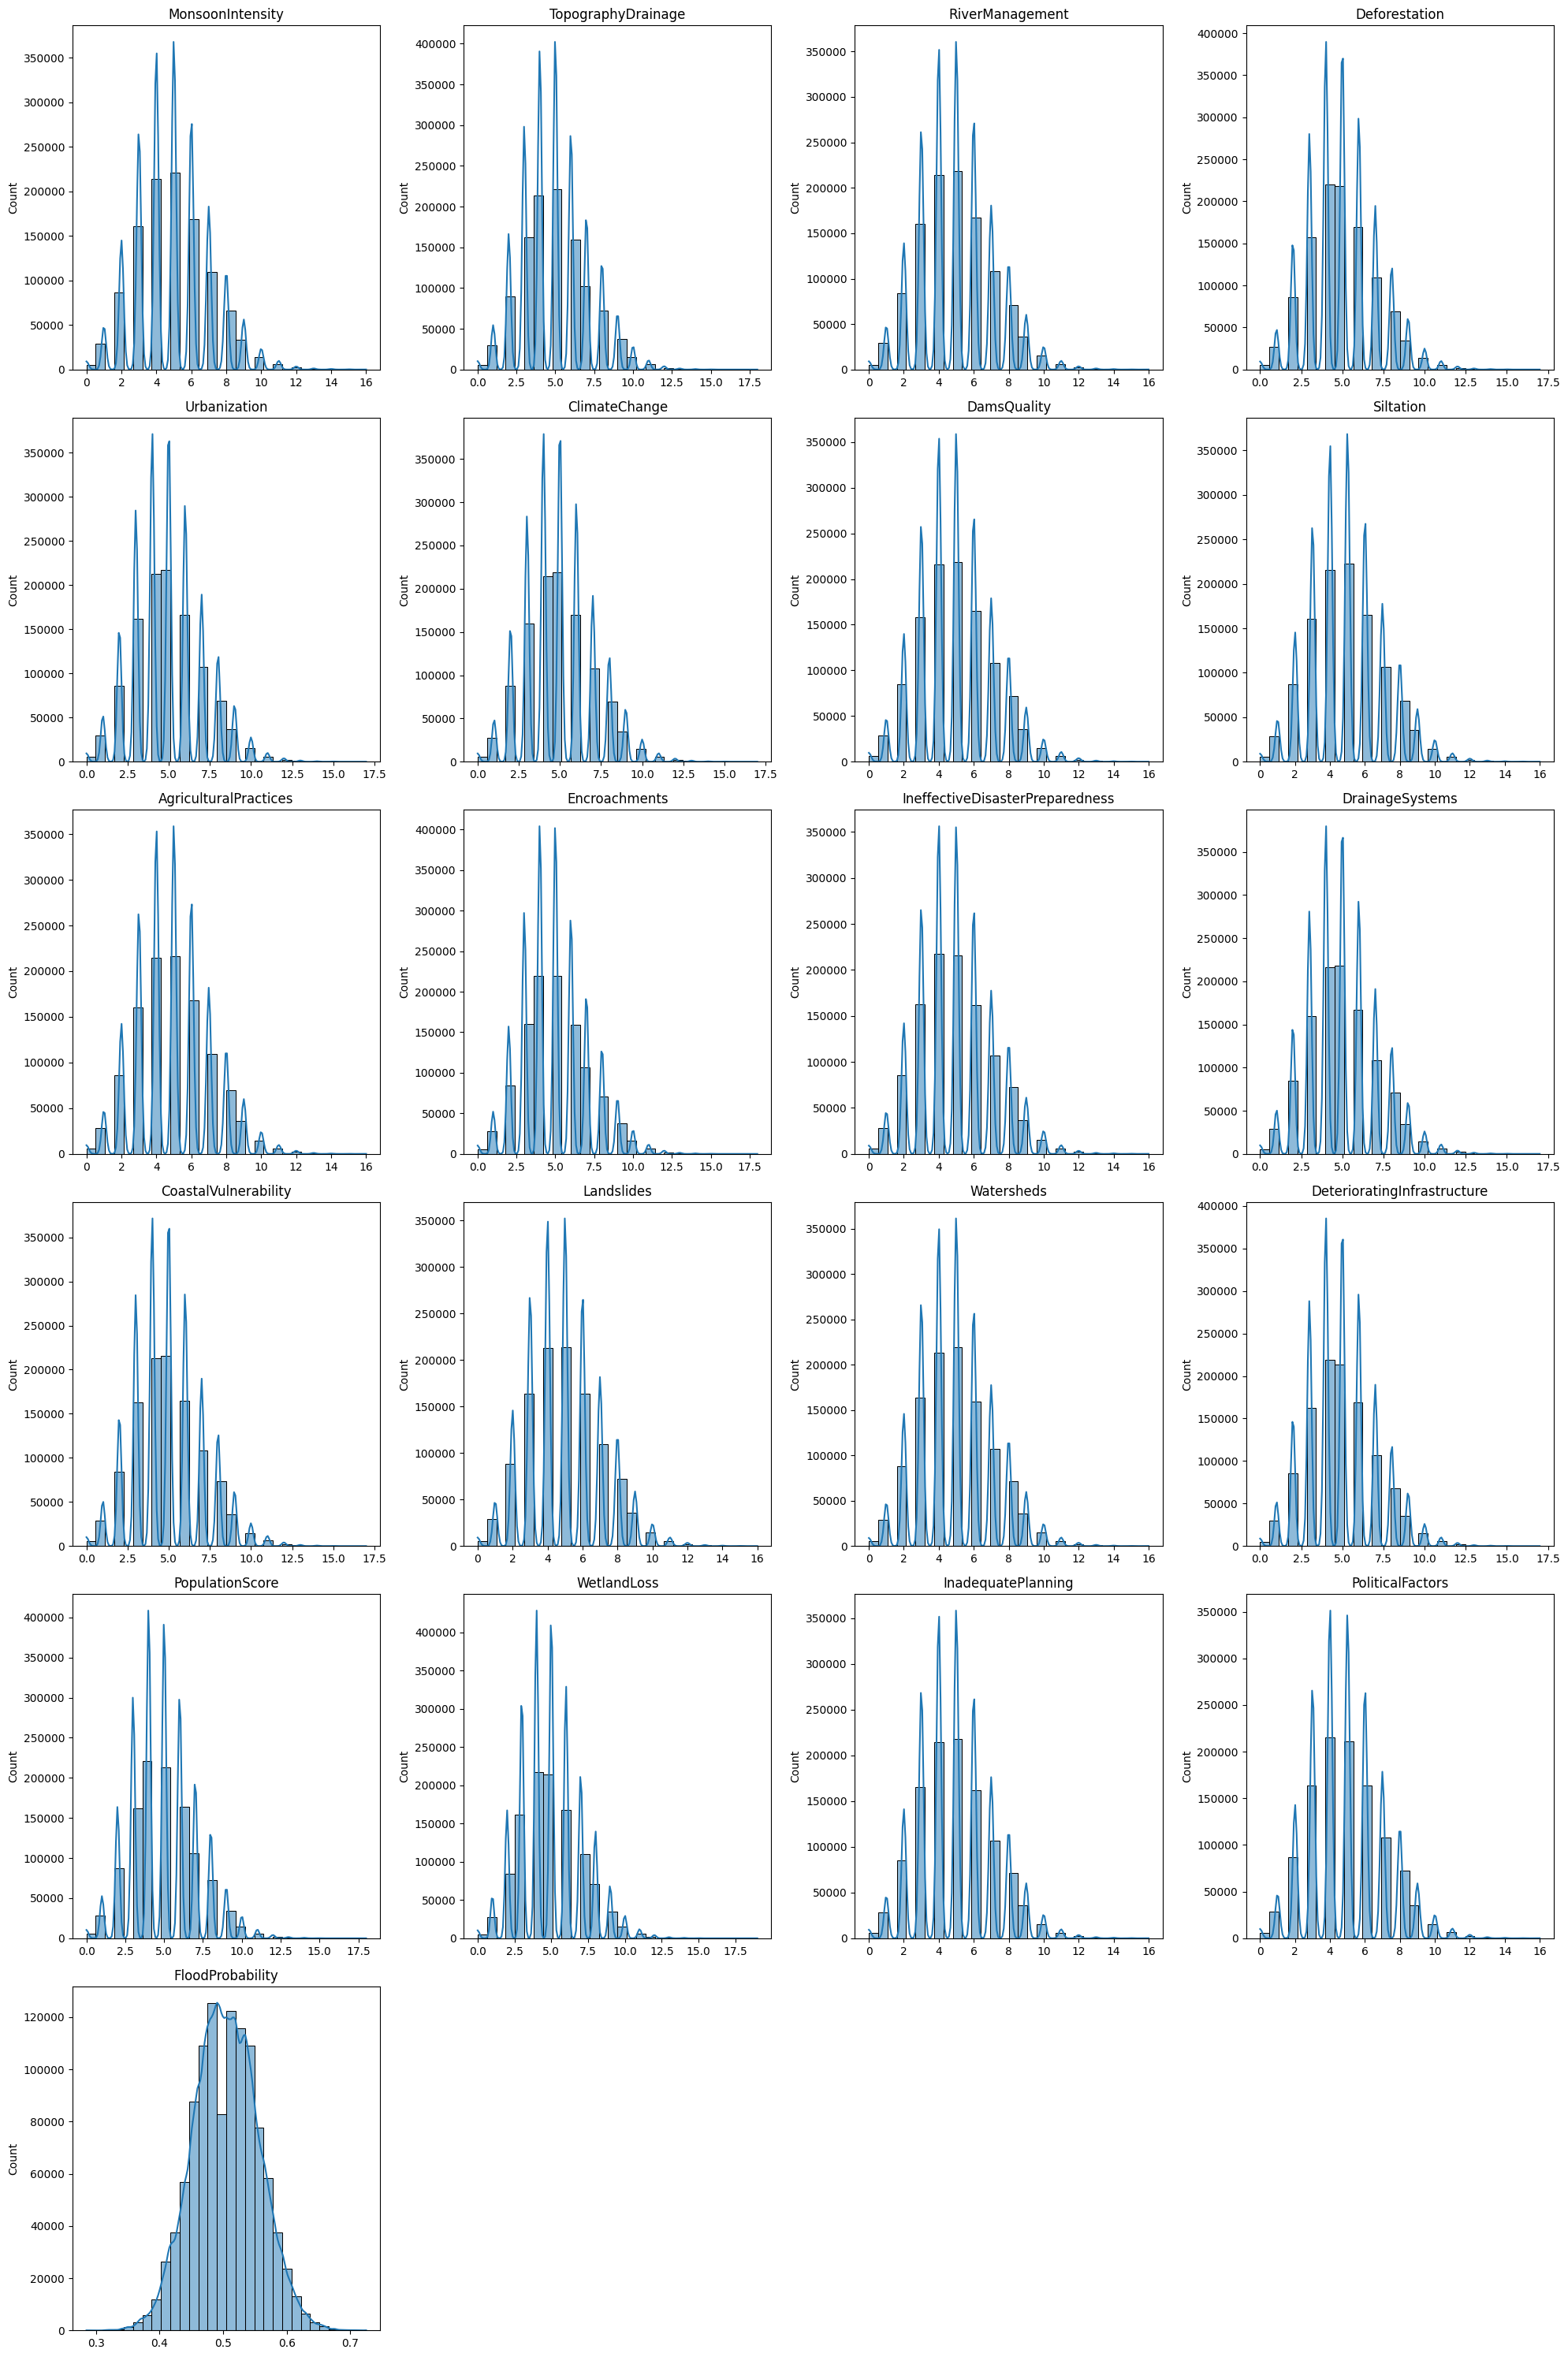

In [4]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 30))

# List of columns to plot
columns_to_plot = train_df.columns[1:]  # Exclude 'id' column

# Number of columns
n_cols = 4
n_rows = len(columns_to_plot) // n_cols + (len(columns_to_plot) % n_cols > 0)

# Plot each feature
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(train_df[column], kde=True, bins=30)
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()


Step 4: Correlation Analysis

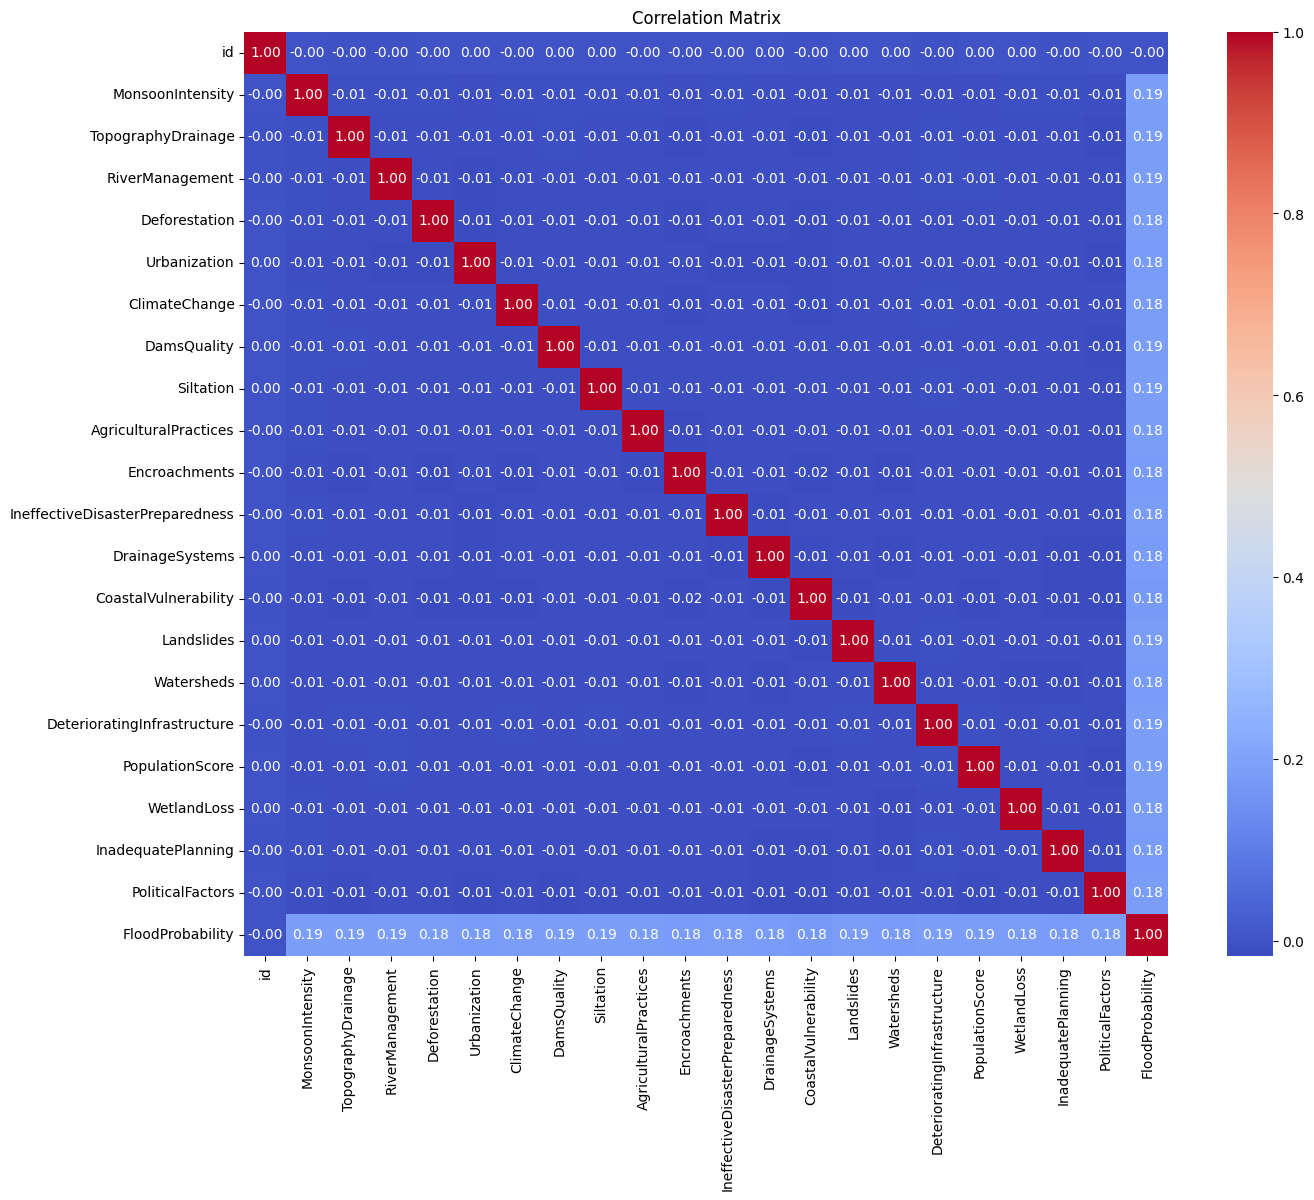

In [5]:
# Compute the correlation matrix
correlation_matrix = train_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


Step 5: Visualize Pairwise Relationships

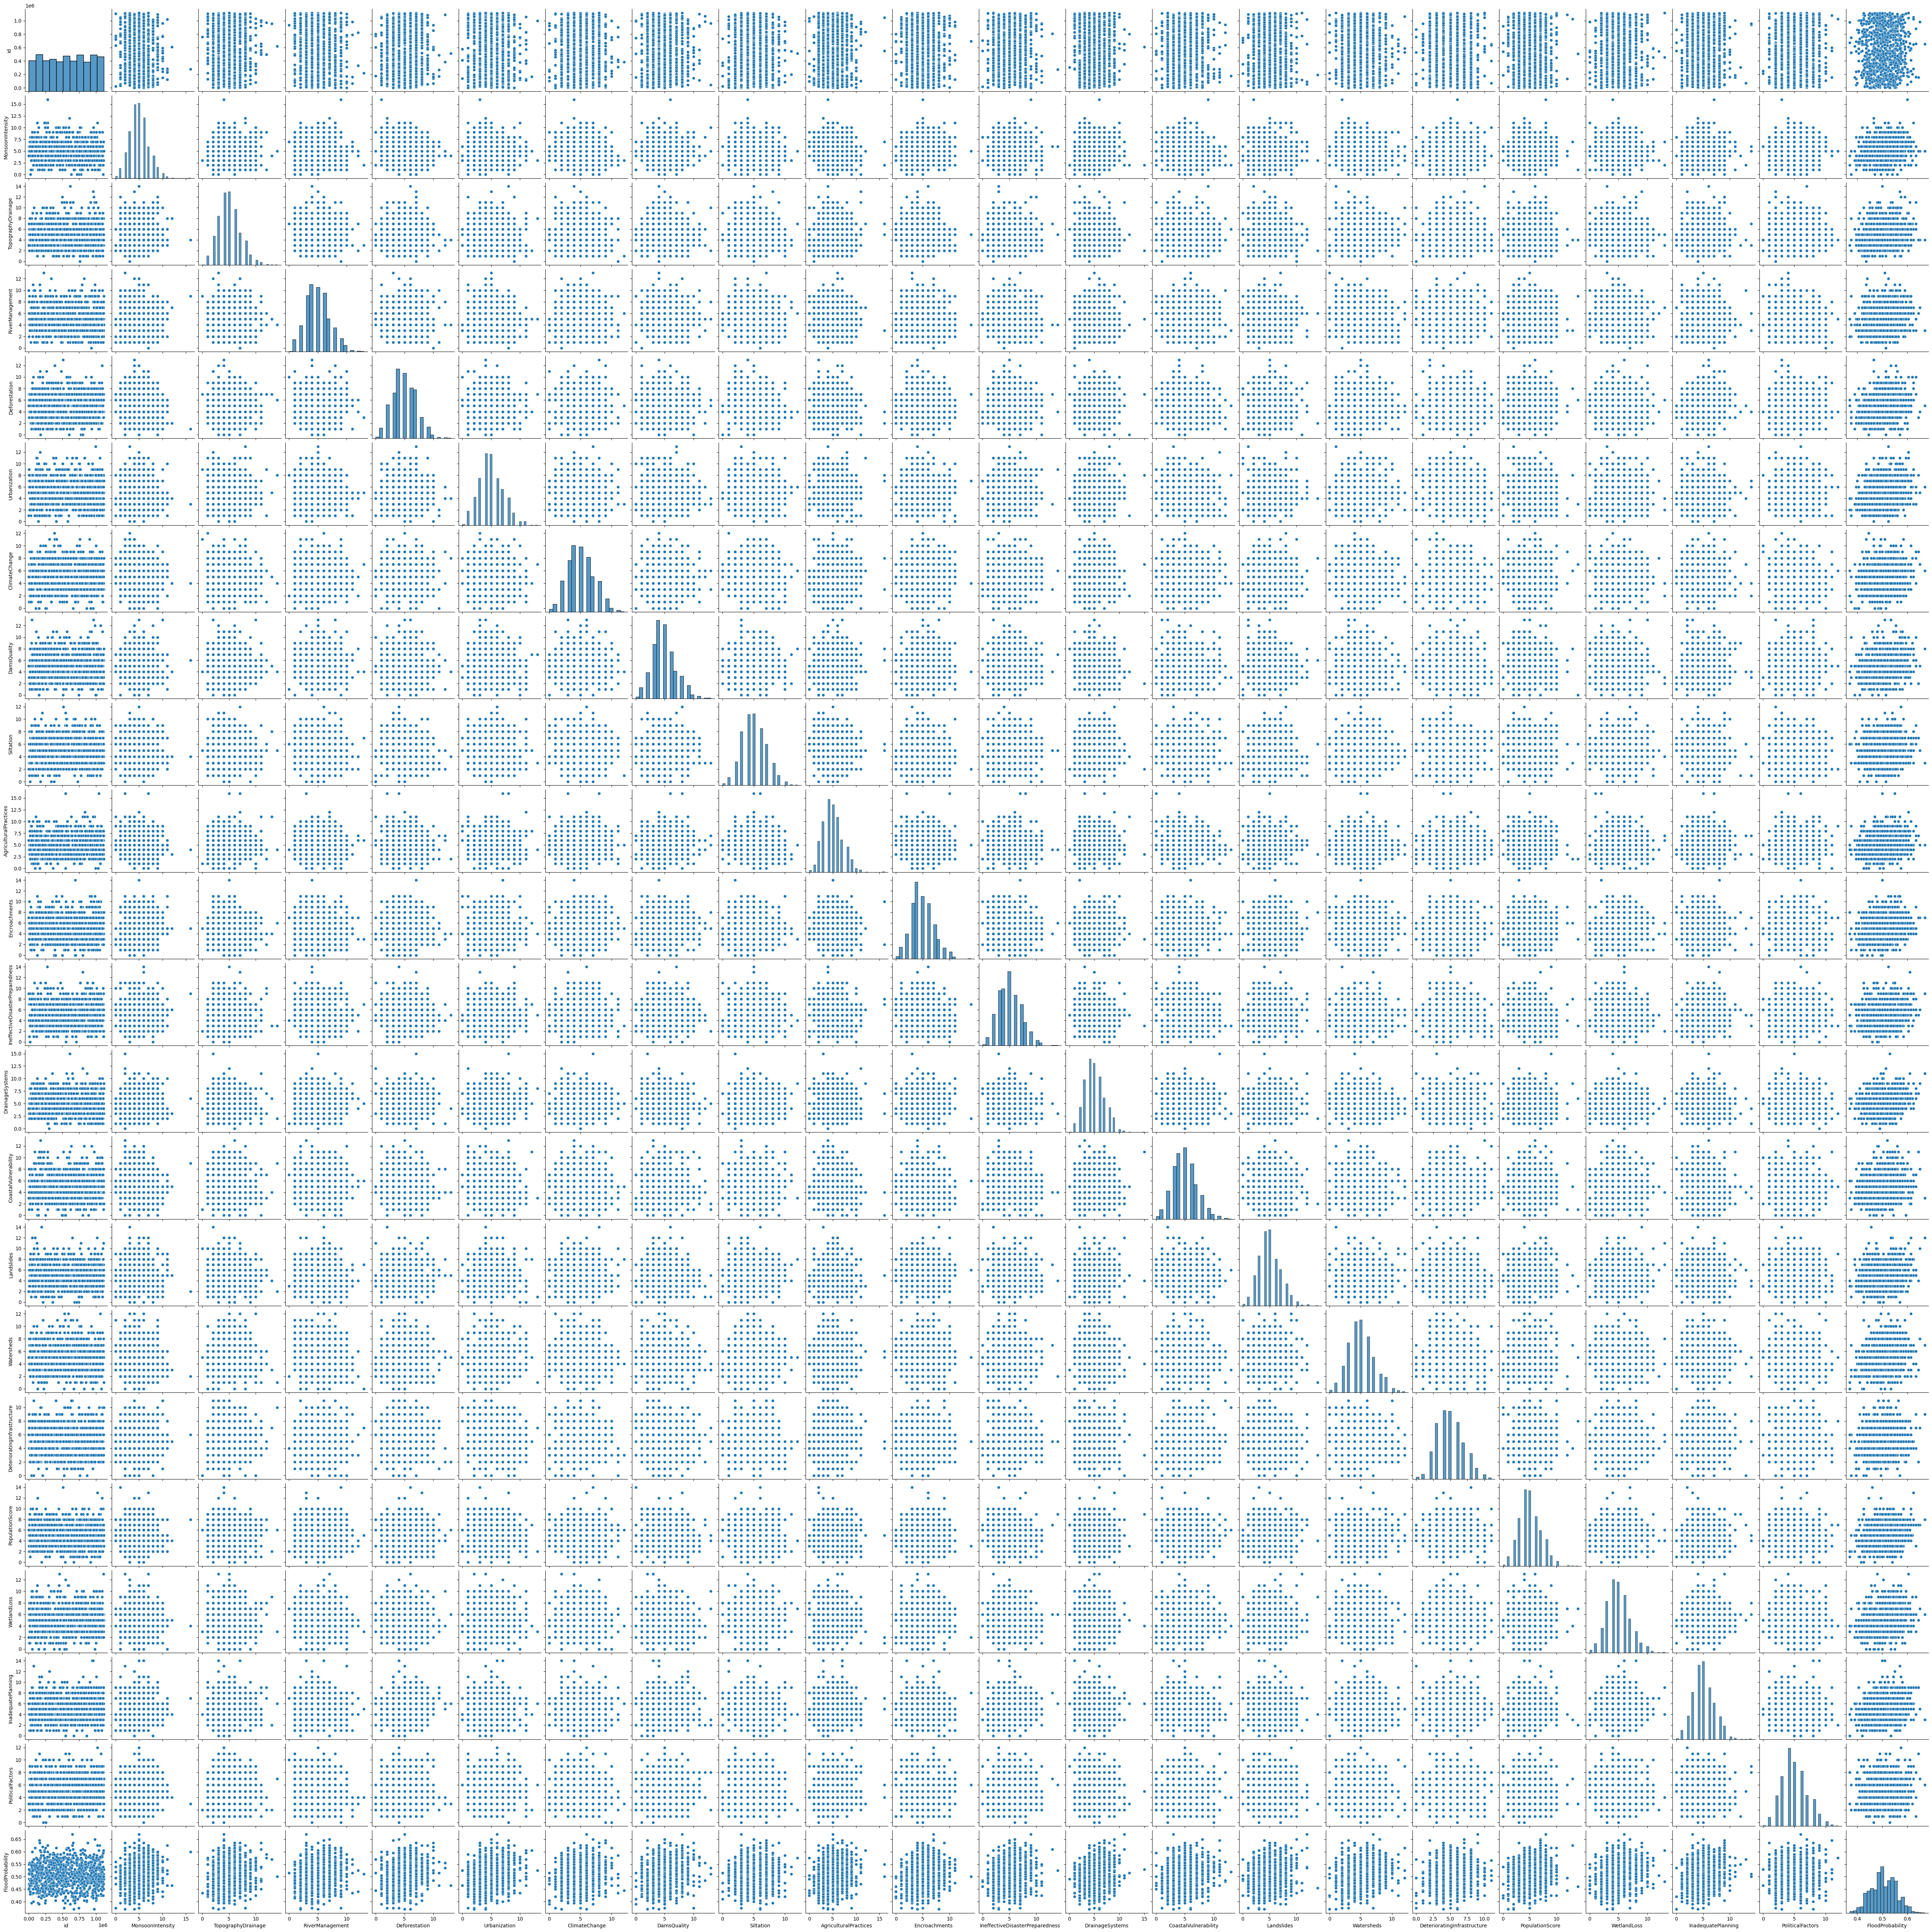

In [6]:
# If you want to visualize pairwise relationships
sns.pairplot(train_df.sample(1000))  # Sampling to avoid plotting too many points
plt.show()

